In [2]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 23: Hypothesis Testing, Continued

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 

Step 1: State hypotheses:
The null hypothesis is that the woman cannot pick with any consistency beyond randomness.
The alternate hypothesis is that she can predict whether milk or tea is added first.

Step 2: Test statistic: The number of times she correctly picks tea first.

In [3]:
M,n,N=8,4,4
stats.hypergeom.rvs(M,n,N,size=10)

array([2, 2, 3, 2, 2, 1, 2, 2, 3, 1])

Step 3: P-Value: Find the probability that X is greater than or equal to 3

In [4]:
stats.hypergeom.pmf([3,4],M,n,N).sum()

0.24285714285714263

Step 4: Conclude: Since we have a low p-value of .243 we must fail to reject the null hypothesis.

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

In [5]:
iris=Table().read_table("iris.csv")
iris.group(4,np.mean)

species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


Step 1: The null hypothesis is that they have equal mean sepal widths. The alternate hypothesis is that the virginica has larger mean sepal width.

Step 2: The test statistic will be the difference between mean sepal widths. The obseved difference is 0.204.

Step 3: P-Value

In [6]:
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
obs=np.diff(iris_sub.group(0,np.mean).column(1))[0]
print(obs)
iris_sub

0.20399999999999974


species,sepal_width
versicolor,3.2
versicolor,3.2
versicolor,3.1
versicolor,2.3
versicolor,2.8
versicolor,2.8
versicolor,3.3
versicolor,2.4
versicolor,2.9
versicolor,2.7


In [7]:
num_obs=iris_sub.num_rows
ts=[]
for _ in np.arange(10000):
    iris_sample=iris_sub.with_column("sampled",iris_sub.sample(num_obs,with_replacement=False).column(1))
    ts=np.append(ts,np.diff(iris_sample.group(0,np.mean).column(2))[0])

Step 4: Conclude

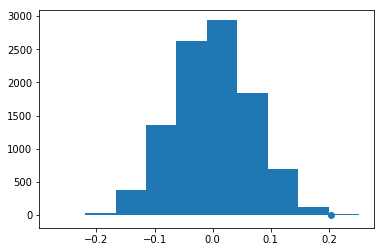

In [34]:
plt.hist(ts)
plt.scatter(obs,0)
plt.show()

In [37]:
np.mean(ts>obs)

0.001